In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import random

In [3]:
def euler(y0,t0,h,thr):
    y_values = [] # Initialize array for the values of ys'
    t = t0 # Initialize t(0)
    y = y0 # Initialize y(0)
    
    # While y is less than a given threshold, keep calculating values
    while y < thr:
        t += h
        y += h * f(t,y,y0)
        y_values.append(y)
    return y_values,t

In [4]:
def f(t,v,v_rest):
    ## Parameters ##
    I_0 = 0.01 # Initial current [A]
    R = 10**4 # Resistance of the membrane [Ohms]
    tau = 0.02 # Time for neurons to spike (~20ms) [ms]

    ## Diferential equation for Integrate-and-Fire ##
    dv_dt = (-(v-v_rest)+R*I_0)/tau
    return dv_dt

In [5]:
def I_F(v_rest,h,thr,tf,t_ref,lmbda): 

    length_v = int(tf/h) # Length v_values
    t_ref_i = int(t_ref/h) # Refractory time in indices
    v_values = np.zeros(length_v) # Initialize array for v(t)

    ## Calculation of values for the voltage ##
    i = 0 # Initial index set to 0
    t = 0 # Initalize time to 0
    step = 0 # Possible spikes

    while i < length_v:
    
        rnd_thr = random.random() # Random threshold (0 < rnd_thr < 1)
        prob = poisson.cdf(step,mu=lmbda) # Step computed in a Poisson distribution
        step +=1 # Update step

        # If the probability exceeds the threshold, then there is a spike; if not, the neuron remains in resting state
        if prob < rnd_thr:

            # If there's enough space, the neuron is not stimulated
            rnd_time = int(t_ref_i*4*random.random())
            if i + rnd_time < length_v:
                v_values[i:i+rnd_time] = v_rest # Resting voltage for t_ref seconds
                i = i+rnd_time
                t = i*h
            else:
                v_values[i:length_v] = v_rest # Fill the remaining space with resting voltage
                break
        else:
            v_t,t = euler(v_rest,t,h,thr) # Call Euler's method function
            new_i = int(round(t/h)) # New index = current time / time step

            # If there's enough space, proceed with the spiking
            if new_i + t_ref_i + 2 <= length_v:

                ## Resting state ##
                v_values[i:new_i] = v_t # Store calculated values for the voltage in v_values
                i = new_i+1 # Current index is new index+1

                ## Depolarization ##
                v_values[i] = v_values[i-1] + 80 # Neuron reaches 40mV when spiking
                i += 1 # Advance one index

                ## Repolarization ##
                v_values[i] = v_rest-10 # Voltage reset
                i += 1 # Advance one index

                ## Hyperpolarization ##
                new_i = i + t_ref_i # New index is current index + refractory time in indices
                v_values[i:new_i] = v_rest # The neuron does not do anything

                i = new_i # Update index
                t = i*h # Update time
            else:
                v_values[i:length_v] = v_rest # Fill the remaining space with resting voltage
                break
    return v_values

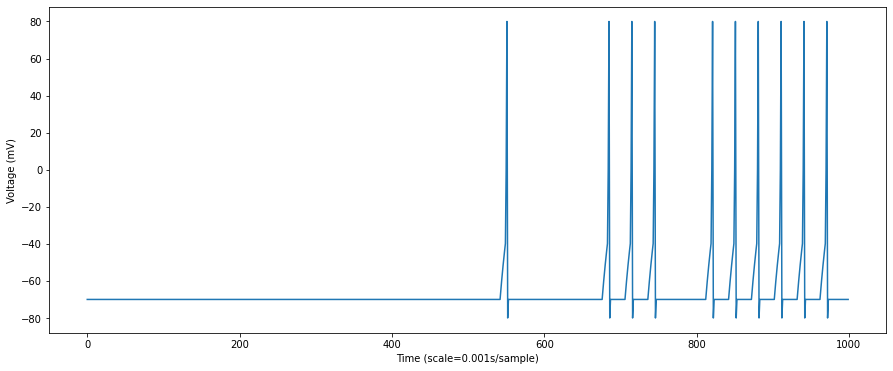

In [23]:
## Initialization of parameters ##
v_rest = -70 # Resting potential (~-70mV) [mV]
h = 0.001 # Step size [s] (we can think of it as a sampling rate)
thr = -40 # Threshold for the spiking [mV]
tf = 1 # End time [s]
t_ref = 0.02 # Refractory time [s]
lmbda = 14 # Lambda [mean]

v_t = I_F(v_rest,h,thr,tf,t_ref,lmbda) # Call Integrate-n-Fire function

plt.figure(figsize=(15, 6))
plt.xlabel("Time (scale="+str(h)+"s/sample)")
plt.ylabel("Voltage (mV)")
plt.plot(np.arange(0,len(v_t)),v_t)